# Importing the Data
### by: TM

In [5]:
# Installing packages
!pip install ibllib

     |████████████████████████████████| 1.2 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 61 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 49.5 MB 165 kB/s  eta 0:00:01
     |████████████████████████████████| 89 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 355 kB 75.8 MB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your package

In [4]:
# Mount to GDrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

KeyError: 'CLOUDSDK_CONFIG'

In [6]:
# Import the packages
import numpy as np
import matplotlib.pyplot as plt
from oneibl.onelight import ONE
import os

In [9]:
# @ Set some global variables
figsize = [12,12]
dpi = 400
one = ONE()

In [ ]:
# @title **[do not run]** Download the files from source (No need to run. The files are already stored in the GDrive)
# Run this field if you do not have the necessary files on GDrive. This will take approx 15 GB of space ~35-40 min of time!


!unzip "!wget https://ndownloader.figshare.com/articles/9974357/versions/2"
%cp /content/nicklab* '/content/gdrive/My Drive/Project/Datasets/Steinemtz/Train' -rv

--2020-11-11 10:04:48--  https://ndownloader.figshare.com/articles/9974357/versions/2
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 54.220.134.224, 34.250.14.20, 108.128.252.44, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|54.220.134.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16486591014 (15G) [application/zip]
Saving to: ‘2’

2                   100%[===================>]  15.35G  20.4MB/s    in 12m 58s 

2020-11-11 10:17:49 (20.2 MB/s) - ‘2’ saved [16486591014/16486591014]



----
### Import data from FigShare to `ONE`
**(Not advised)** Run this field if you prefer to work from the online data.

In [11]:
# Import from this link:

sn = 12

one.set_figshare_url("https://figshare.com/articles/steinmetz/9974357");
sessions = one.search(['spikes']);
session = sessions[sn];

spikes = one.load_object(session, 'spikes');

03:01:15.403 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17993633 to /home/jupyter/.one/data/figshare_00/nicklab/Subjects/Lederberg/2017-12-06/001/alf/spikes.amps.npy.
03:01:42.094 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17993648 to /home/jupyter/.one/data/figshare_00/nicklab/Subjects/Lederberg/2017-12-06/001/alf/spikes.clusters.npy.
03:01:48.621 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17993654 to /home/jupyter/.one/data/figshare_00/nicklab/Subjects/Lederberg/2017-12-06/001/alf/spikes.depths.npy.
03:02:11.016 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17993657 to /home/jupyter/.one/data/figshare_00/nicklab/Subjects/Lederberg/2017-12-06/001/alf/spikes.times.npy.


## Import to RAM:

Choose the session of choice (from 0 to 28 for training, and from 0 to 4 for test/validation) as the variable `sn` in the first line.

This will yield a list `data` with 4 elements:
0.   spike.amplitude
1.   spike.cluster
2.   spike.depth
3.   spike.time

We will mainly use the `cluster` and the `time` of the spike. The cluster is meant to be the spatial index for the firing neuron, and time is the temporal index.

memmap([[139.06002993],
        [ 93.13777106],
        [132.34595041],
        ...,
        [326.86739679],
        [152.23953088],
        [283.06971999]])

NameError: name 'data' is not defined

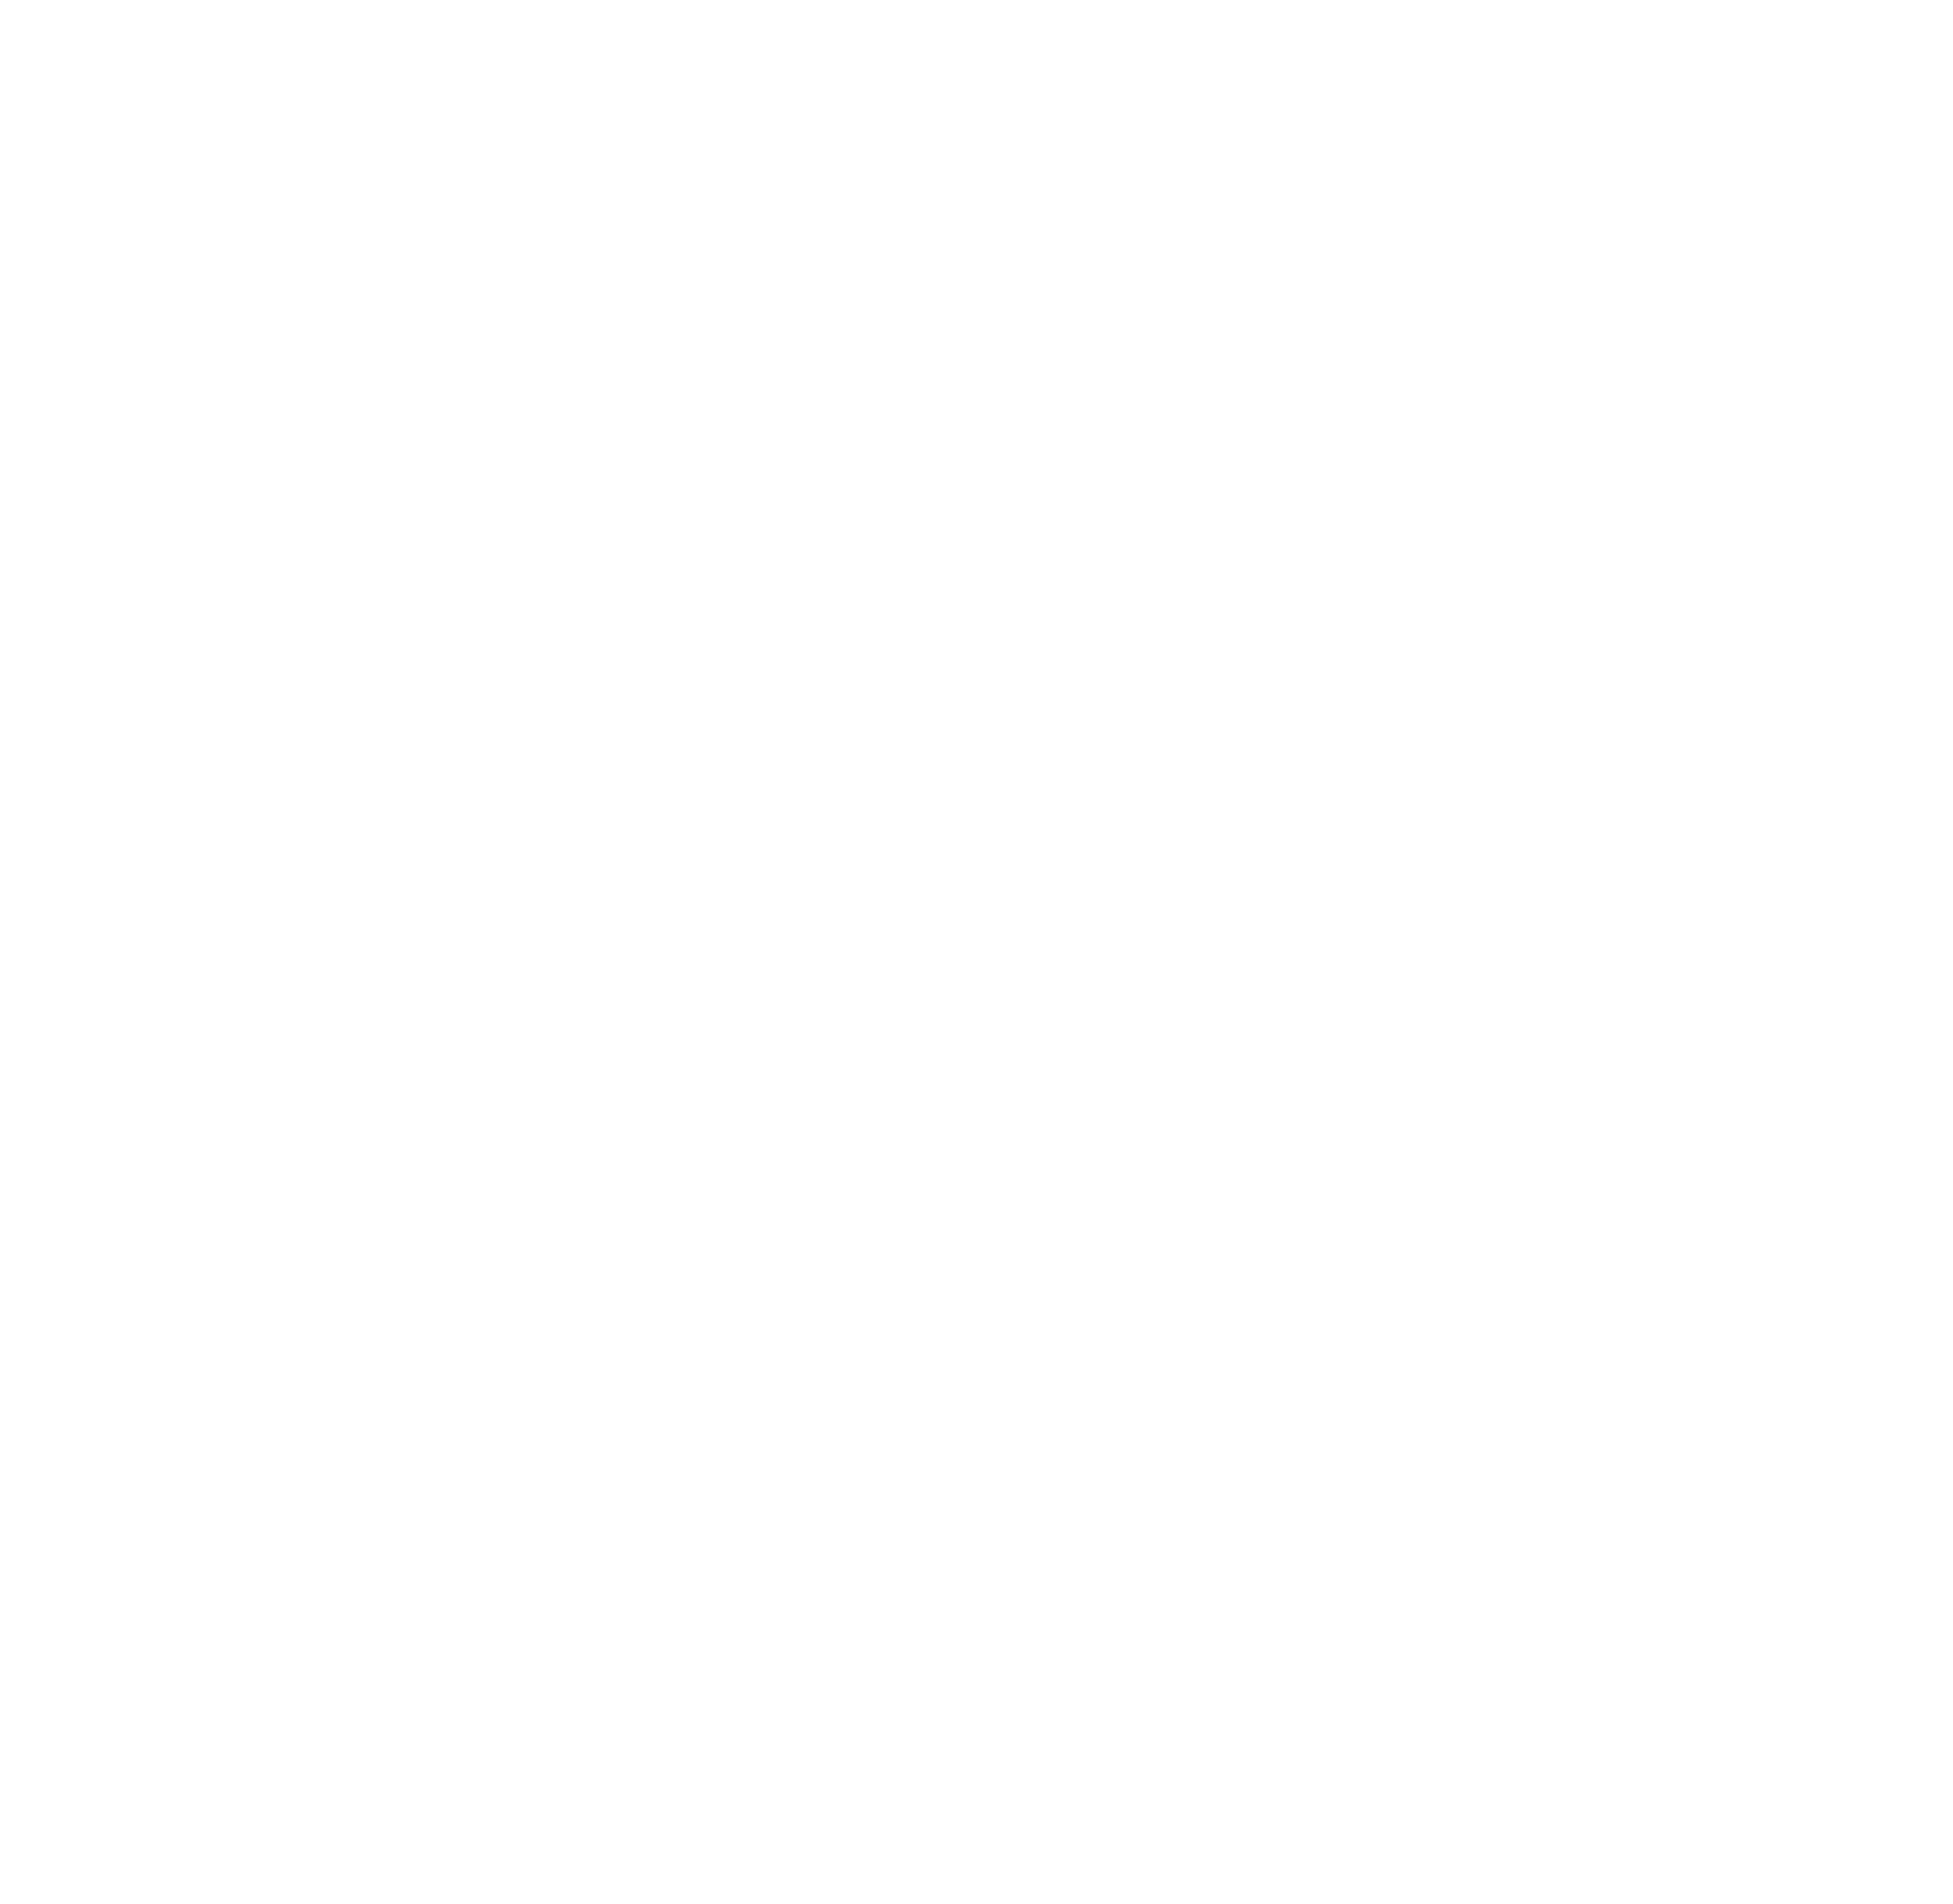

In [12]:
# Choose the session number (from 0 to 28 for Training; 0 to 4 for Test/Validation)
sn = 28

data = []
for i in range(4*sn, 4*sn+4):
  data.append(np.load("/content/gdrive/My Drive/Project/Datasets/Steinemtz/Train/%s" % files[i], allow_pickle=True));

# Raster plot of all spikes based on cluster

spikeraster = plt.figure(figsize=figsize, dpi=dpi);
#axsr = spikeraster.add_axes();
#axsr =
spikeraster = plt.axis("off");
spikeraster = plt.plot(data[3], data[1], ',');
plt.gcf();
sns = str(sn)
plt.savefig("/content/gdrive/My Drive/Project/Datasets/rasters/train/%s.png" % sn, dpi=dpi);

## Extracting the events from the dataset

